In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
data.shape

(252000, 13)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
data.shape

(252000, 13)

In [8]:
data_count = data.Risk_Flag.value_counts()
print('Class 0:', data_count[0])
print('Class 1:', data_count[1])
print('Proportion:', round(data_count[0] / data_count[1], 2), ': 1')
print('Total CC Trans:', len(data))

Class 0: 221004
Class 1: 30996
Proportion: 7.13 : 1
Total CC Trans: 252000


In [9]:
data_dup = data[data.duplicated(keep='last')]
data_dup

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag


In [10]:
data = data.drop_duplicates()
data.shape

(252000, 13)

In [11]:
data = data.reset_index(drop=True)
data_BK2 = data.copy()

In [12]:
for i in data.columns:
    print(data[i].value_counts())

1         1
167991    1
167993    1
167994    1
167995    1
         ..
84005     1
84006     1
84007     1
84008     1
252000    1
Name: Id, Length: 252000, dtype: int64
7936020    77
9775375    71
1996629    71
9345456    70
1886371    40
           ..
8927336     1
5656901     1
8171741     1
3164826     1
9070230     1
Name: Income, Length: 41920, dtype: int64
27    5197
66    5092
48    4967
33    4921
41    4827
45    4806
54    4785
68    4772
35    4643
50    4624
69    4617
76    4585
55    4563
25    4543
72    4533
79    4505
60    4504
59    4498
53    4490
47    4483
30    4468
78    4455
22    4430
34    4414
57    4394
58    4368
56    4344
24    4326
23    4322
62    4311
31    4257
70    4251
61    4235
40    4233
43    4206
21    4205
49    4203
26    4156
37    4153
71    4150
42    4134
64    4132
29    4109
67    3995
65    3969
74    3954
63    3942
77    3916
28    3901
32    3834
75    3829
39    3800
38    3793
46    3627
44    3622
73    3569
36    3444
51    

In [13]:
data['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [14]:
data['Married/Single'] = data['Married/Single'].str.replace('single', '1')
data['Married/Single'] = data['Married/Single'].str.replace('married', '0')
data['Married/Single'] = data['Married/Single'].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  int32 
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int32(1), int64(7), object(5)
memory usage: 24.0+ MB


In [16]:
data['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [17]:
data['House_Ownership'] = data['House_Ownership'].str.replace('rented', '1')
data['House_Ownership'] = data['House_Ownership'].str.replace('owned', '0')
data['House_Ownership'] = data['House_Ownership'].str.replace('norent_noown', '2')
data['House_Ownership'] = data['House_Ownership'].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  int32 
 5   House_Ownership    252000 non-null  int32 
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int32(2), int64(7), object(4)
memory usage: 23.1+ MB


In [19]:
data['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [20]:
data['Car_Ownership'] = data['Car_Ownership'].str.replace('yes', '1')
data['Car_Ownership'] = data['Car_Ownership'].str.replace('no', '0')
data['Car_Ownership'] = data['Car_Ownership'].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  int32 
 5   House_Ownership    252000 non-null  int32 
 6   Car_Ownership      252000 non-null  int32 
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int32(3), int64(7), object(3)
memory usage: 22.1+ MB


In [22]:
data['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [23]:
data['Profession'] = data['Profession'].str.replace('Physician', '0')
data['Profession'] = data['Profession'].str.replace('Statistician', '1')
data['Profession'] = data['Profession'].str.replace('Web_designer', '2')
data['Profession'] = data['Profession'].str.replace('Psychologist', '3')
data['Profession'] = data['Profession'].str.replace('Computer_hardware_engineer', '4')
data['Profession'] = data['Profession'].str.replace('Drafter', '5')
data['Profession'] = data['Profession'].str.replace('Magistrate', '6')
data['Profession'] = data['Profession'].str.replace('Fashion_Designer', '7')
data['Profession'] = data['Profession'].str.replace('Air_traffic_controller', '8')
data['Profession'] = data['Profession'].str.replace('Comedian', '9')
data['Profession'] = data['Profession'].str.replace('Industrial_Engineer', '10')
data['Profession'] = data['Profession'].str.replace('Mechanical_engineer', '11')
data['Profession'] = data['Profession'].str.replace('Chemical_engineer', '12')
data['Profession'] = data['Profession'].str.replace('Technical_writer', '13')
data['Profession'] = data['Profession'].str.replace('Hotel_Manager', '14')
data['Profession'] = data['Profession'].str.replace('Financial_Analyst', '15')
data['Profession'] = data['Profession'].str.replace('Graphic_Designer', '16')
data['Profession'] = data['Profession'].str.replace('Flight_attendant', '17')
data['Profession'] = data['Profession'].str.replace('Biomedical_Engineer', '18')
data['Profession'] = data['Profession'].str.replace('Secretary', '19')
data['Profession'] = data['Profession'].str.replace('Software_Developer', '20')
data['Profession'] = data['Profession'].str.replace('Petroleum_Engineer', '21')
data['Profession'] = data['Profession'].str.replace('Police_officer', '22')
data['Profession'] = data['Profession'].str.replace('Computer_operator', '23')
data['Profession'] = data['Profession'].str.replace('Politician', '24')
data['Profession'] = data['Profession'].str.replace('Microbiologist', '25')
data['Profession'] = data['Profession'].str.replace('Technician', '26')
data['Profession'] = data['Profession'].str.replace('Artist', '27')
data['Profession'] = data['Profession'].str.replace('Lawyer', '28')
data['Profession'] = data['Profession'].str.replace('Consultant', '29')
data['Profession'] = data['Profession'].str.replace('Dentist', '30')
data['Profession'] = data['Profession'].str.replace('Scientist', '31')
data['Profession'] = data['Profession'].str.replace('Surgeon', '32')
data['Profession'] = data['Profession'].str.replace('Aviator', '33')
data['Profession'] = data['Profession'].str.replace('Technology_specialist', '34')
data['Profession'] = data['Profession'].str.replace('Design_Engineer', '35')
data['Profession'] = data['Profession'].str.replace('Surveyor', '36')
data['Profession'] = data['Profession'].str.replace('Geologist', '37')
data['Profession'] = data['Profession'].str.replace('Analyst', '38')
data['Profession'] = data['Profession'].str.replace('Army_officer', '39')
data['Profession'] = data['Profession'].str.replace('Architect', '40')
data['Profession'] = data['Profession'].str.replace('Chef', '41')
data['Profession'] = data['Profession'].str.replace('Librarian', '42')
data['Profession'] = data['Profession'].str.replace('Civil_engineer', '43')
data['Profession'] = data['Profession'].str.replace('Designer', '44')
data['Profession'] = data['Profession'].str.replace('Economist', '45')
data['Profession'] = data['Profession'].str.replace('Firefighter', '46')
data['Profession'] = data['Profession'].str.replace('Chartered_Accountant', '47')
data['Profession'] = data['Profession'].str.replace('Civil_servant', '48')
data['Profession'] = data['Profession'].str.replace('Official', '49')
data['Profession'] = data['Profession'].str.replace('Engineer', '50')
data['Profession'] = data['Profession'].astype(int)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  int32 
 5   House_Ownership    252000 non-null  int32 
 6   Car_Ownership      252000 non-null  int32 
 7   Profession         252000 non-null  int32 
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int32(4), int64(7), object(2)
memory usage: 21.1+ MB


In [25]:
data['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [26]:
data['STATE'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
features = ['CITY','STATE']
label_encoder = LabelEncoder()
for col in features:
    data[col] = label_encoder.fit_transform(data[col])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Id                 252000 non-null  int64
 1   Income             252000 non-null  int64
 2   Age                252000 non-null  int64
 3   Experience         252000 non-null  int64
 4   Married/Single     252000 non-null  int32
 5   House_Ownership    252000 non-null  int32
 6   Car_Ownership      252000 non-null  int32
 7   Profession         252000 non-null  int32
 8   CITY               252000 non-null  int32
 9   STATE              252000 non-null  int32
 10  CURRENT_JOB_YRS    252000 non-null  int64
 11  CURRENT_HOUSE_YRS  252000 non-null  int64
 12  Risk_Flag          252000 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 19.2 MB


In [29]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,1,0,11,251,13,3,13,0
1,2,7574516,40,10,1,1,0,20,227,14,9,13,0
2,3,3991815,66,4,0,1,0,13,8,12,4,10,0
3,4,6256451,41,2,1,1,1,20,54,17,2,12,1
4,5,5768871,47,11,1,1,0,48,296,22,3,14,1


In [30]:
IndepVar = []
for col in data.columns:
    if col != 'Risk_Flag':
        IndepVar.append(col)

TargetVar = 'Risk_Flag'

x = data[IndepVar]
y = data[TargetVar]

In [31]:
Results = pd.read_csv("HTResults.csv", header=0)
Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [32]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((176400, 12), (75600, 12), (176400,), (75600,))

In [33]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
ModelLGBMC=lgb.LGBMClassifier()


ModelLR = LogisticRegression()
ModelRF = RandomForestClassifier()
ModelDC = DecisionTreeClassifier()
ModelET = ExtraTreesClassifier()
ModelSVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                  probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                  max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
ModelXGB=XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelKNN = KNeighborsClassifier()
ModelBAG = BaggingClassifier()
ModelGNB = GaussianNB()
ModelLGBMC=lgb.LGBMClassifier()



Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[64452  1877]
 [ 5128  4143]]
Outcome values : 
 4143 5128 1877 64452
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     66329
           1       0.69      0.45      0.54      9271

    accuracy                           0.91     75600
   macro avg       0.81      0.71      0.75     75600
weighted avg       0.90      0.91      0.90     75600

Accuracy : 90.7 %
Precision : 68.8 %
Recall : 44.7 %
F1 Score : 0.542
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 71.0 %
MCC : 0.507
roc_auc_score: 0.709


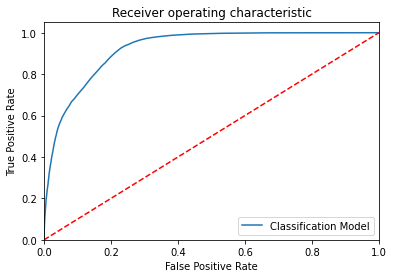

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[63975  2354]
 [ 5208  4063]]
Outcome values : 
 4063 5208 2354 63975
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     66329
           1       0.63      0.44      0.52      9271

    accuracy                           0.90     75600
   macro avg       0.78      0.70      0.73     75600
weighted avg       0.89      0.90      0.89     75600

Accuracy : 90.0 %
Precision : 63.3 %
Recall : 43.8 %
F1 Score : 0.518
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 70.2 %
MCC : 0.474
roc_auc_score: 0.701


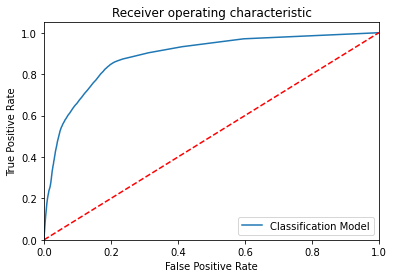

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[62706  3623]
 [ 4758  4513]]
Outcome values : 
 4513 4758 3623 62706
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     66329
           1       0.55      0.49      0.52      9271

    accuracy                           0.89     75600
   macro avg       0.74      0.72      0.73     75600
weighted avg       0.88      0.89      0.89     75600

Accuracy : 88.9 %
Precision : 55.5 %
Recall : 48.7 %
F1 Score : 0.519
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 71.6 %
MCC : 0.457
roc_auc_score: 0.716


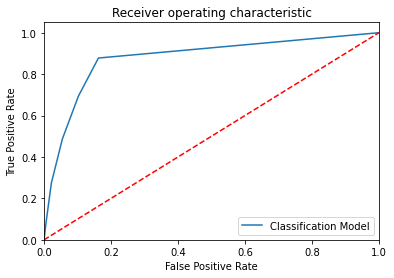

-----------------------------------------------------------------------------------------------------


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
mm=[ModelRF,ModelET,ModelKNN]
for models in mm:
    models = models.fit(x_train,y_train)
    y_pred = models.predict(x_test)
    print('Model Name: ', models)
    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report:\n', classification_report(y_test,y_pred))
    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show() 
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    print('-----------------------------------------------------------------------------------------------------')

In [36]:
Results.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",4143,5128,1877,64452,0.907,0.688,0.447,0.542,0.972,0.507,0.709290,0.710
1,"(ExtraTreeClassifier(random_state=19408292), E...",4063,5208,2354,63975,0.900,0.633,0.438,0.518,0.965,0.474,0.701379,0.702
2,KNeighborsClassifier(),4513,4758,3623,62706,0.889,0.555,0.487,0.519,0.945,0.457,0.716083,0.716
